#Image Completeness Detection
This notebook analyzes uploaded images to determine if they are complete or incomplete based on pixel intensity ratios.

### Upload Images


In [ ]:
from google.colab import files
uploaded = files.upload()

### Import Required Libraries

In [51]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

### Define Completeness Detection Function

In [52]:
def is_incomplete(image_path, white_thresh=240, black_thresh=15, ratio_thresh=0.2):
    """
    Determines if an image is incomplete based on pixel intensity ratios.

    Args:
        image_path (str): Path to the image file
        white_thresh (int): Threshold for white pixels (default: 240)
        black_thresh (int): Threshold for black pixels (default: 15)
        ratio_thresh (float): Ratio threshold for incomplete classification (default: 0.3)

    Returns:
        bool: True if image is incomplete, False otherwise
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Could not load image: {image_path}")

    total_pixels = image.size
    white_pixels = np.sum(image >= white_thresh)
    black_pixels = np.sum(image <= black_thresh)

    white_ratio = white_pixels / total_pixels
    black_ratio = black_pixels / total_pixels

    return white_ratio > ratio_thresh or black_ratio > ratio_thresh

### Analyze All Uploaded Images

In [53]:
# Get list of uploaded image files
image_files = list(uploaded.keys())

print(f"Analyzing {len(image_files)} uploaded images:\n")

# Evaluate each image
results = {}
for img_name in image_files:
    try:
        incomplete = is_incomplete(img_name)
        status = 'Incomplete' if incomplete else 'Complete'
        results[img_name] = incomplete
        print(f"{img_name}: {status}")
    except Exception as e:
        print(f"{img_name}: Error - {str(e)}")
        results[img_name] = None

Analyzing 1 uploaded images:

Image_928 (2).jpg: Incomplete


### Display Sample Image with Analysis

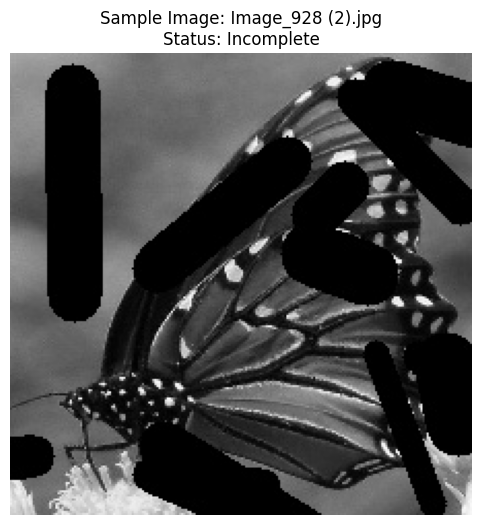


Image Statistics for Image_928 (2).jpg:
Total pixels: 50,176
White pixels (>=240): 134 (0.27%)
Black pixels (<=15): 18,766 (37.40%)


In [54]:
# Display the first image as a sample
if image_files:
    sample_img = image_files[0]
    img = cv2.imread(sample_img, cv2.IMREAD_GRAYSCALE)

    plt.figure(figsize=(8, 6))
    plt.imshow(img, cmap='gray')

    # Add title based on analysis result
    status = "Incomplete" if is_incomplete(sample_img) else "Complete"
    plt.title(f"Sample Image: {sample_img}\nStatus: {status}")
    plt.axis("off")
    plt.show()

    # Display image statistics
    total_pixels = img.size
    white_pixels = np.sum(img >= 240)
    black_pixels = np.sum(img <= 15)

    print(f"\nImage Statistics for {sample_img}:")
    print(f"Total pixels: {total_pixels:,}")
    print(f"White pixels (>=240): {white_pixels:,} ({white_pixels/total_pixels:.2%})")
    print(f"Black pixels (<=15): {black_pixels:,} ({black_pixels/total_pixels:.2%})")
else:
    print("No images were uploaded.")